In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bitcoin_price_df = pd.read_csv('Data/bitcoin_price.csv', parse_dates=['Date'])
bitcoin_price_df

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-02-20,11231.80,11958.50,11231.80,11403.70,"9,926,540,000","189,536,000,000"
1,2018-02-19,10552.60,11273.80,10513.20,11225.30,"7,652,090,000","178,055,000,000"
2,2018-02-18,11123.40,11349.80,10326.00,10551.80,"8,744,010,000","187,663,000,000"
3,2018-02-17,10207.50,11139.50,10149.40,11112.70,"8,660,880,000","172,191,000,000"
4,2018-02-16,10135.70,10324.10,9824.82,10233.90,"7,296,160,000","170,960,000,000"
5,2018-02-15,9488.32,10234.80,9395.58,10166.40,"9,062,540,000","160,025,000,000"
6,2018-02-14,8599.92,9518.54,8599.92,9494.63,"7,909,820,000","145,023,000,000"
7,2018-02-13,8926.72,8958.47,8455.41,8598.31,"5,696,720,000","150,516,000,000"
8,2018-02-12,8141.43,8985.92,8141.43,8926.57,"6,256,440,000","137,258,000,000"
9,2018-02-11,8616.13,8616.13,7931.10,8129.97,"6,122,190,000","145,245,000,000"


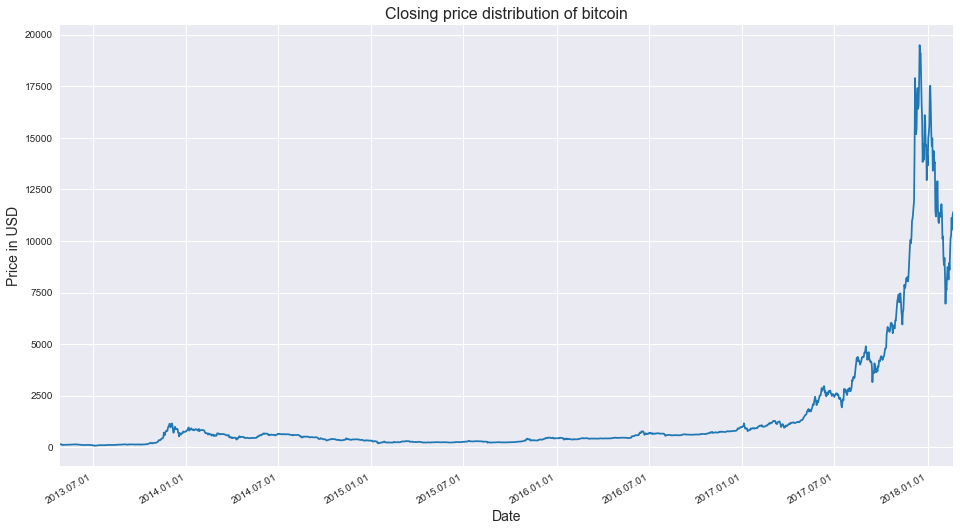

In [26]:
import matplotlib.dates as mpl_dates
bitcoin_price_df['Date_mpl'] = bitcoin_price_df['Date'].apply(lambda x: mpl_dates.date2num(x))

fig, ax = plt.subplots(figsize=(16,9))
sns.tsplot(data=bitcoin_price_df.Close.values, time=bitcoin_price_df.Date_mpl.values, color='tab:blue', ax=ax)
ax.xaxis.set_major_locator(mpl_dates.AutoDateLocator())
ax.xaxis.set_major_formatter(mpl_dates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price in USD', fontsize=14)
plt.title("Closing price distribution of bitcoin", fontsize=16)
plt.show()